In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy.io import arff

import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, f1_score, precision_score, recall_score
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#from google.colab import drive
#drive.mount('/drive')

In [3]:
#data = pd.read_excel('/drive/My Drive/Colab Notebooks/dataset.xlsx')
data = pd.read_excel('dataset.xlsx')
data.head()

,Age,Income,Home_Ownership,Emp_Length,Loan_Intent,Loan Grade,Loan_Amnt,Loan_Int_Rate,Loan_Status,Loan_Percent_Income,Default_on_File,Credit_Hist_Length
0,22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
data.tail()

,Age,Income,Home_Ownership,Emp_Length,Loan_Intent,Loan Grade,Loan_Amnt,Loan_Int_Rate,Loan_Status,Loan_Percent_Income,Default_on_File,Credit_Hist_Length
32576,57,53000,MORTGAGE,1,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2,MEDICAL,B,6475,9.99,0,0.15,N,30


In [5]:
data.describe()

,Age,Income,Loan_Amnt,Loan_Status,Loan_Percent_Income,Credit_Hist_Length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,9589.371106,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,6322.086646,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,500.000000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,5000.000000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,8000.000000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,12200.000000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,35000.000000,1.000000,0.830000,30.000000


In [6]:
data = data.replace('?', np.NaN)
data = data.replace('Y', 1)
data = data.replace('N', 0)
data

,Age,Income,Home_Ownership,Emp_Length,Loan_Intent,Loan Grade,Loan_Amnt,Loan_Int_Rate,Loan_Status,Loan_Percent_Income,Default_on_File,Credit_Hist_Length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,0,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,0,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,0,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,0,26


In [7]:
df = data
df.dropna()
df["Age"] = pd.to_numeric(df["Age"])
df["Income"] = pd.to_numeric(df["Income"])
df["Emp_Length"] = pd.to_numeric(df["Emp_Length"])
df["Loan_Amnt"] = pd.to_numeric(df["Loan_Amnt"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  32581 non-null  int64  
 1   Income               32581 non-null  int64  
 2   Home_Ownership       32581 non-null  object 
 3   Emp_Length           31686 non-null  float64
 4   Loan_Intent          32581 non-null  object 
 5   Loan Grade           32581 non-null  object 
 6   Loan_Amnt            32581 non-null  int64  
 7   Loan_Int_Rate        29465 non-null  float64
 8   Loan_Status          32581 non-null  int64  
 9   Loan_Percent_Income  32581 non-null  float64
 10  Default_on_File      32581 non-null  int64  
 11  Credit_Hist_Length   32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


All NaN or '?' values were accounted for, and there are currently no longer any null values in the datafram. All categorical data is now of an object (string) type, and all other data is of a numeric type.

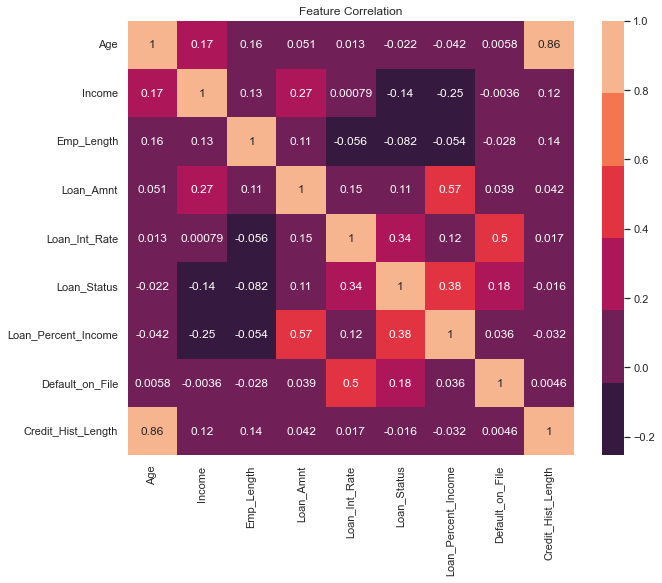

In [8]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap=sns.color_palette("rocket"),edgecolor="k")
plt.title("Feature Correlation")
plt.show()

# Data Preprocessing

In [9]:
df = df.dropna()

In [10]:
df.columns

Index(['Age', 'Income', 'Home_Ownership', 'Emp_Length', 'Loan_Intent',
       'Loan Grade', 'Loan_Amnt', 'Loan_Int_Rate', 'Loan_Status',
       'Loan_Percent_Income', 'Default_on_File', 'Credit_Hist_Length'],
      dtype='object')

In [11]:
X_num = df.loc[:,['Age', 'Income', 'Emp_Length', 'Loan_Amnt', 'Loan_Int_Rate', 'Loan_Status',
       'Loan_Percent_Income', 'Credit_Hist_Length']]
X_cat = df.loc[:,['Home_Ownership', 'Loan_Intent']]

In [12]:
X_num

,Age,Income,Emp_Length,Loan_Amnt,Loan_Int_Rate,Loan_Status,Loan_Percent_Income,Credit_Hist_Length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [13]:
X_cat

,Home_Ownership,Loan_Intent
0,RENT,PERSONAL
1,OWN,EDUCATION
2,MORTGAGE,MEDICAL
3,RENT,MEDICAL
4,RENT,MEDICAL
...,...,...
32576,MORTGAGE,PERSONAL
32577,MORTGAGE,PERSONAL
32578,RENT,HOMEIMPROVEMENT
32579,MORTGAGE,PERSONAL


In [14]:
X_dummy = pd.get_dummies(data = X_cat, columns = X_cat.columns)
X_dummy

,Home_Ownership_MORTGAGE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Loan_Intent_DEBTCONSOLIDATION,Loan_Intent_EDUCATION,Loan_Intent_HOMEIMPROVEMENT,Loan_Intent_MEDICAL,Loan_Intent_PERSONAL,Loan_Intent_VENTURE
0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
32576,1,0,0,0,0,0,0,0,1,0
32577,1,0,0,0,0,0,0,0,1,0
32578,0,0,0,1,0,0,1,0,0,0
32579,1,0,0,0,0,0,0,0,1,0


In [15]:
X_bin = df_bin = df.loc[:,['Loan_Status', 'Default_on_File']]
X_bin

,Loan_Status,Default_on_File
0,1,1
1,0,0
2,1,0
3,1,0
4,1,1
...,...,...
32576,0,0
32577,0,0
32578,1,0
32579,0,0


In [16]:
X_cat_all = pd.concat([X_dummy,X_bin],axis=1)
X_cat_all

,Home_Ownership_MORTGAGE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Loan_Intent_DEBTCONSOLIDATION,Loan_Intent_EDUCATION,Loan_Intent_HOMEIMPROVEMENT,Loan_Intent_MEDICAL,Loan_Intent_PERSONAL,Loan_Intent_VENTURE,Loan_Status,Default_on_File
0,0,0,0,1,0,0,0,0,1,0,1,1
1,0,0,1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,1,0,0,0,0,0,0,0,1,0,0,0
32577,1,0,0,0,0,0,0,0,1,0,0,0
32578,0,0,0,1,0,0,1,0,0,0,1,0
32579,1,0,0,0,0,0,0,0,1,0,0,0


In [17]:
X = pd.concat([X_num,X_cat_all],axis=1)
X

,Age,Income,Emp_Length,Loan_Amnt,Loan_Int_Rate,Loan_Status,Loan_Percent_Income,Credit_Hist_Length,Home_Ownership_MORTGAGE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Loan_Intent_DEBTCONSOLIDATION,Loan_Intent_EDUCATION,Loan_Intent_HOMEIMPROVEMENT,Loan_Intent_MEDICAL,Loan_Intent_PERSONAL,Loan_Intent_VENTURE,Loan_Status,Default_on_File
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,0,1,0,0,0,0,1,0,1,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,0,0,0,0,0,1,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,0,1,0,0,0,1,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,0,0,0,0,0,0,1,0,0,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,0,0,0,0,0,0,1,0,0,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,0,1,0,0,1,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,0,0,0,0,0,0,1,0,0,0


In [18]:
y = df['Loan Grade']
# Perform Ordinal Encoding on the target array
y = y.replace('A', 0)
y = y.replace('B', 1)
y = y.replace('C', 2)
y = y.replace('D', 3)
y = y.replace('E', 4)
y = y.replace('F', 5)
y = y.replace('G', 6)
y

0        3
1        1
2        2
3        2
4        2
        ..
32576    2
32577    0
32578    1
32579    1
32580    1
Name: Loan Grade, Length: 28638, dtype: int64

In [19]:
X_scaled = X.copy()
for col in X_scaled.columns:
    X_scaled[col] = (X_scaled[col] - X_scaled[col].mean()) / (X_scaled[col].std()) 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10, shuffle=True)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (22910, 20)
X_test shape:  (5728, 20)
y_train shape:  (22910,)
y_test shape:  (5728,)


In [21]:
X_train

,Age,Income,Emp_Length,Loan_Amnt,Loan_Int_Rate,Loan_Status,Loan_Percent_Income,Credit_Hist_Length,Home_Ownership_MORTGAGE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Loan_Intent_DEBTCONSOLIDATION,Loan_Intent_EDUCATION,Loan_Intent_HOMEIMPROVEMENT,Loan_Intent_MEDICAL,Loan_Intent_PERSONAL,Loan_Intent_VENTURE,Loan_Status,Default_on_File
15282,-0.749110,1.009529,0.532257,0.607219,-1.740235,-0.525812,-0.653130,-0.939396,-0.837181,-0.057385,3.473379,-1.016318,-0.435459,-0.498703,-0.354546,-0.476153,2.207234,-0.459965,-0.525812,-0.465638
28012,0.994033,1.316634,-0.430525,0.370241,-0.972284,1.901755,-0.935104,0.546310,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,-0.498703,-0.354546,2.100092,-0.453040,-0.459965,1.901755,-0.465638
13989,-0.590643,-0.061732,0.050866,0.686212,0.510977,-0.525812,0.474769,-0.939396,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,-0.498703,-0.354546,-0.476153,2.207234,-0.459965,-0.525812,-0.465638
14449,-0.907578,-0.551817,-0.430525,0.844198,0.675095,1.901755,2.824559,-0.691779,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,-0.498703,-0.354546,-0.476153,2.207234,-0.459965,1.901755,-0.465638
6496,-0.590643,-0.267003,0.532257,1.634127,0.510977,-0.525812,2.166618,-0.939396,-0.837181,-0.057385,3.473379,-1.016318,-0.435459,-0.498703,2.820407,-0.476153,-0.453040,-0.459965,-0.525812,-0.465638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8311,-0.907578,-0.283040,0.532257,-0.340695,-1.368646,-0.525812,-0.183172,-0.691779,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,-0.498703,-0.354546,-0.476153,2.207234,-0.459965,-0.525812,-0.465638
31865,2.578708,1.188933,-0.430525,4.003914,1.687676,1.901755,0.380778,2.279635,1.194443,-0.057385,-0.287894,-1.016318,-0.435459,-0.498703,-0.354546,2.100092,-0.453040,-0.459965,1.901755,2.147518
20168,0.043227,-0.603713,-1.152612,-0.893646,1.675290,1.901755,-0.277163,1.041546,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,-0.498703,-0.354546,-0.476153,2.207234,-0.459965,1.901755,-0.465638
8313,-0.907578,-0.379261,-0.911916,-0.340695,1.213900,1.901755,0.004811,-0.691779,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,-0.498703,-0.354546,-0.476153,-0.453040,2.174003,1.901755,-0.465638


In [22]:
X_test

,Age,Income,Emp_Length,Loan_Amnt,Loan_Int_Rate,Loan_Status,Loan_Percent_Income,Credit_Hist_Length,Home_Ownership_MORTGAGE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Loan_Intent_DEBTCONSOLIDATION,Loan_Intent_EDUCATION,Loan_Intent_HOMEIMPROVEMENT,Loan_Intent_MEDICAL,Loan_Intent_PERSONAL,Loan_Intent_VENTURE,Loan_Status,Default_on_File
16228,-0.907578,-0.627832,-0.911916,-0.854149,-0.015442,-0.525812,-0.183172,-0.444161,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,2.005130,-0.354546,-0.476153,-0.453040,-0.459965,-0.525812,-0.465638
24855,-0.115240,1.272533,-0.430525,0.081917,0.603874,1.901755,-0.935104,0.051075,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,-0.498703,-0.354546,-0.476153,-0.453040,2.174003,1.901755,-0.465638
30937,1.786370,-0.339169,-0.189830,0.054269,1.625745,-0.525812,0.474769,2.279635,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,-0.498703,-0.354546,-0.476153,2.207234,-0.459965,-0.525812,-0.465638
20494,-0.115240,-0.363224,0.291561,-0.767257,-1.093051,-0.525812,-0.559138,1.041546,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,-0.498703,-0.354546,-0.476153,-0.453040,2.174003,-0.525812,-0.465638
28264,0.835565,-0.254174,2.698516,0.054269,1.659807,-0.525812,0.286786,1.041546,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,-0.498703,-0.354546,-0.476153,-0.453040,2.174003,-0.525812,2.147518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12031,-0.590643,0.695207,-0.911916,0.243852,-1.099244,-0.525812,-0.653130,-0.444161,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,2.005130,-0.354546,-0.476153,-0.453040,-0.459965,-0.525812,-0.465638
24287,0.835565,0.069770,1.254343,0.054269,-1.625662,-0.525812,-0.277163,0.793928,1.194443,-0.057385,-0.287894,-1.016318,-0.435459,-0.498703,2.820407,-0.476153,-0.453040,-0.459965,-0.525812,-0.465638
26047,0.677098,0.454654,-0.671221,-0.735660,-1.093051,-0.525812,-1.123087,1.041546,1.194443,-0.057385,-0.287894,-1.016318,-0.435459,-0.498703,-0.354546,-0.476153,2.207234,-0.459965,-0.525812,-0.465638
6244,-0.590643,-0.587740,-1.152612,-0.577674,0.427369,-0.525812,0.286786,-0.939396,-0.837181,-0.057385,-0.287894,0.983910,-0.435459,-0.498703,-0.354546,-0.476153,-0.453040,2.174003,-0.525812,-0.465638


# Mulitclass Classification

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

## One vs Rest with L1 Regularization

In [24]:
train_acc_ovr_l1 = []
test_acc_ovr_l1 = []
c_values = [0.0001, 0.001, 0.01, 0.1, 1.0 ,10.0, 100.0, 1000.0]

In [25]:
def ovr_L1(X_train, X_test, y_train, y_test, c_values):
    
    train_acc_ovr_l1.clear()
    test_acc_ovr_l1.clear()
    max_test_acc = -1
    c_of_max = -1
    
    for c in c_values:
        
        print("C =", c)

        #Fitting the model to One Vs Rest with L1 Regularization
        ovr_l1 = LogisticRegression(multi_class="ovr", warm_start=True, solver="liblinear", penalty="l1", C = c)
        ovr_l1.fit(X_train, y_train)

        #Predicting and Determining the Training Accuracy
        y_pred_train = ovr_l1.predict(X_train)
        train_acc_score = accuracy_score(y_train, y_pred_train)
        train_acc_ovr_l1.append(train_acc_score)
        print("Training Accuracy =", train_acc_score)

        ##Predicting and Determining the Accuracy on Test Data
        y_pred_test = ovr_l1.predict(X_test)
        test_acc_score = accuracy_score(y_test, y_pred_test)
        test_acc_ovr_l1.append(test_acc_score)
        print("Validation Accuracy =", test_acc_score)

        print("\n")
        
        #Keep track of c that resulted in highest testing accuracy
        if (test_acc_score > max_test_acc):
            max_test_acc = test_acc_score
            c_of_max = c
  
    return max_test_acc, c_of_max
    
    
        

In [28]:
max_test_acc, c_of_max = ovr_L1(X_train, X_test, y_train, y_test, c_values)

C = 0.0001
Training Accuracy = 0.3254037538192929
Validation Accuracy = 0.339909217877095


C = 0.001
Training Accuracy = 0.6888258402444347
Validation Accuracy = 0.6864525139664804


C = 0.01
Training Accuracy = 0.7682671322566564
Validation Accuracy = 0.7672835195530726


C = 0.1
Training Accuracy = 0.7686163247490179
Validation Accuracy = 0.7688547486033519


C = 1.0
Training Accuracy = 0.7688782191182889
Validation Accuracy = 0.7683310055865922


C = 10.0


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy = 0.7690528153644697
Validation Accuracy = 0.7683310055865922


C = 100.0


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy = 0.7690528153644697
Validation Accuracy = 0.7683310055865922


C = 1000.0
Training Accuracy = 0.7690528153644697
Validation Accuracy = 0.7683310055865922




/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
print("Max Testing Accuracy =", max_test_acc)
print("Occured when C =", c_of_max)

Max Testing Accuracy = 0.7688547486033519
Occured when C = 0.1


In [30]:
ovr_l1 = LogisticRegression(multi_class="ovr", warm_start=True, solver="liblinear", penalty="l1", C = c_of_max)
ovr_l1.fit(X_train, y_train)
ovr_l1_pred = ovr_l1.predict(X_test)

Text(89.18, 0.5, 'predicted label')

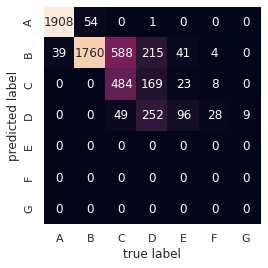

In [31]:
mat = confusion_matrix(y_test, ovr_l1_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
cbar=False, xticklabels=['A','B','C','D','E','F','G'], yticklabels=['A','B','C','D','E','F','G'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [32]:
prec_score,recall_score,f_score,support = precision_recall_fscore_support(y_test, ovr_l1_pred, average='weighted')
print("Precision =", prec_score)
print("Recall =", recall_score)
print("F1_Score =", f_score)

Precision = 0.744007809155469
Recall = 0.7688547486033519
F1_Score = 0.7389127407085108


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


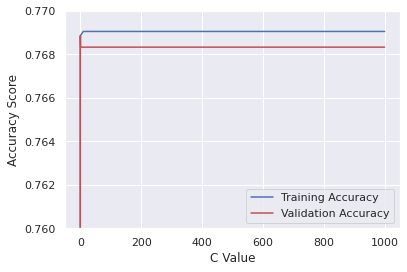

In [43]:
plt.plot(c_values, train_acc_ovr_l1, 'b') 
plt.plot(c_values, test_acc_ovr_l1,'r') 
plt.xlabel("C Value")
plt.ylabel("Accuracy Score")
plt.ylim(0.76,0.77)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')

## One vs Rest with L2 Regularization

In [26]:
train_acc_ovr_l2 = []
test_acc_ovr_l2 = []

In [27]:
def ovr_L2(X_train, X_test, y_train, y_test, c_values):
    
    train_acc_ovr_l2.clear()
    test_acc_ovr_l2.clear()
    max_test_acc = -1
    c_of_max = -1
    
    for c in c_values:
        
        print("C =", c)

        #Fitting the model to One Vs Rest with L1 Regularization
        ovr_l1 = LogisticRegression(multi_class="ovr", warm_start=True, solver="liblinear", penalty="l2", C = c)
        ovr_l1.fit(X_train, y_train)

        #Predicting and Determining the Training Accuracy
        y_pred_train = ovr_l1.predict(X_train)
        train_acc_score = accuracy_score(y_train, y_pred_train)
        train_acc_ovr_l2.append(train_acc_score)
        print("Training Accuracy =", train_acc_score)

        ##Predicting and Determining the Accuracy on Test Data
        y_pred_test = ovr_l1.predict(X_test)
        test_acc_score = accuracy_score(y_test, y_pred_test)
        test_acc_ovr_l2.append(test_acc_score)
        print("Validation Accuracy =", test_acc_score)

        print("\n")
        
        #Keep track of c that resulted in highest testing accuracy
        if (test_acc_score > max_test_acc):
            max_test_acc = test_acc_score
            c_of_max = c
  
    return max_test_acc, c_of_max

In [36]:
max_test_acc_l2, c_of_max_l2 = ovr_L2(X_train, X_test, y_train, y_test, c_values)

C = 0.0001
Training Accuracy = 0.6414229594063727
Validation Accuracy = 0.6393156424581006


C = 0.001
Training Accuracy = 0.7151462243561764
Validation Accuracy = 0.7098463687150838


C = 0.01
Training Accuracy = 0.7569183762549105
Validation Accuracy = 0.7548882681564246


C = 0.1
Training Accuracy = 0.7675250982103885
Validation Accuracy = 0.766236033519553


C = 1.0
Training Accuracy = 0.7685290266259276
Validation Accuracy = 0.7683310055865922


C = 10.0
Training Accuracy = 0.7690091663029245
Validation Accuracy = 0.7683310055865922


C = 100.0
Training Accuracy = 0.7690091663029245
Validation Accuracy = 0.7683310055865922


C = 1000.0
Training Accuracy = 0.7690528153644697
Validation Accuracy = 0.7683310055865922




In [37]:
print("Max Testing Accuracy =", max_test_acc_l2)
print("Occured when C =", c_of_max_l2)

Max Testing Accuracy = 0.7683310055865922
Occured when C = 1.0


In [38]:
ovr_l2 = LogisticRegression(multi_class="ovr", warm_start=True, solver="liblinear", penalty="l2", C = c_of_max_l2)
ovr_l2.fit(X_train, y_train)
ovr_l2_pred = ovr_l2.predict(X_test)

Text(89.18, 0.5, 'predicted label')

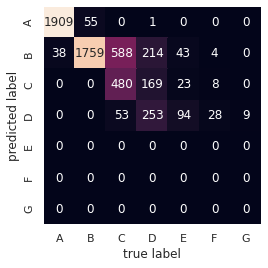

In [39]:
mat = confusion_matrix(y_test, ovr_l2_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
cbar=False, xticklabels=['A','B','C','D','E','F','G'], yticklabels=['A','B','C','D','E','F','G'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [40]:
prec_score,recall_score,f_score,support = precision_recall_fscore_support(y_test, ovr_l2_pred, average='weighted')
print("Precision =", prec_score)
print("Recall =", recall_score)
print("F1_Score =", f_score)

Precision = 0.7432789954946172
Recall = 0.7683310055865922
F1_Score = 0.7382556270570068


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


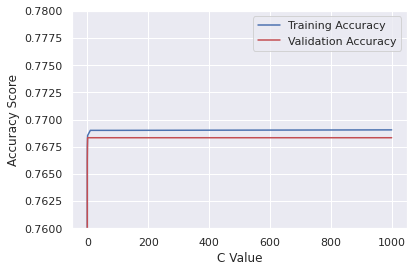

In [44]:
plt.plot(c_values, train_acc_ovr_l2, 'b') 
plt.plot(c_values, test_acc_ovr_l2,'r') 
plt.xlabel("C Value")
plt.ylabel("Accuracy Score")
plt.ylim(0.76,0.78)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')

## OVR with Polynomial Feature Transformation

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly = PolynomialFeatures(degree = 2)
X2_train = poly.fit_transform(X_train)
X2_test = poly.fit_transform(X_test)

In [47]:
c_values_poly = [0.0001, 0.001, 0.01, 0.1]
mta_poly_l1, com_poly_l1 = ovr_L1(X2_train, X2_test, y_train, y_test, c_values_poly)

C = 0.0001
Training Accuracy = 0.3254037538192929
Validation Accuracy = 0.339909217877095


C = 0.001
Training Accuracy = 0.8268878219118289
Validation Accuracy = 0.8308310055865922


C = 0.01
Training Accuracy = 0.8709297250109123
Validation Accuracy = 0.8818086592178771


C = 0.1
Training Accuracy = 0.8889131383675251
Validation Accuracy = 0.8936801675977654




In [48]:
print("Max Testing Accuracy =", mta_poly_l1)
print("Occured when C =", com_poly_l1)

Max Testing Accuracy = 0.8936801675977654
Occured when C = 0.1


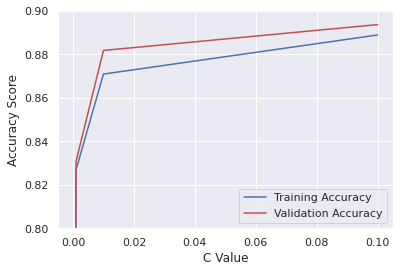

In [50]:
plt.plot(c_values_poly, train_acc_ovr_l1, 'b') 
plt.plot(c_values_poly, test_acc_ovr_l1,'r') 
plt.xlabel("C Value")
plt.ylabel("Accuracy Score")
plt.ylim(0.8,0.9)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')

In [51]:
mta_poly_l2, com_poly_l2 = ovr_L2(X2_train, X2_test, y_train, y_test, c_values_poly)

C = 0.0001
Training Accuracy = 0.7433871671759057
Validation Accuracy = 0.7407472067039106


C = 0.001
Training Accuracy = 0.8027498908773462
Validation Accuracy = 0.7973114525139665


C = 0.01
Training Accuracy = 0.859493670886076
Validation Accuracy = 0.8606843575418994


C = 0.1
Training Accuracy = 0.8872544740288084
Validation Accuracy = 0.8917597765363129




In [52]:
print("Max Testing Accuracy =", mta_poly_l2)
print("Occured when C =", com_poly_l2)

Max Testing Accuracy = 0.8917597765363129
Occured when C = 0.1


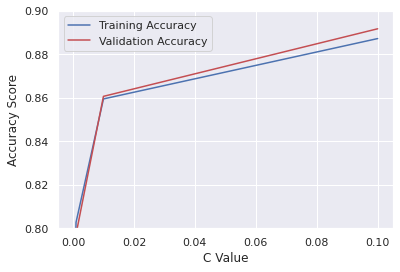

In [53]:
plt.plot(c_values_poly, train_acc_ovr_l2, 'b') 
plt.plot(c_values_poly, test_acc_ovr_l2,'r') 
plt.xlabel("C Value")
plt.ylabel("Accuracy Score")
plt.ylim(0.8,0.9)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')

## Neural Networks with Keras

In [54]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import regularizers

In [55]:
def nn_model_3layer():
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation="relu")) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dense(16, activation="relu")) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [56]:
def nn_model_4layer():
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation="relu")) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dense(16, activation="relu")) ##Hidden layer
  nn_model.add(Dense(12, activation="relu")) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [57]:
def nn_model_5layer():
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation="relu")) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dense(20, activation="relu")) ##Hidden layer
  nn_model.add(Dense(16, activation="relu")) ##Hidden layer
  nn_model.add(Dense(12, activation="relu")) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [58]:
train_encoder = LabelEncoder()
train_encoder.fit(y_train)
encoded_y_train = train_encoder.transform(y_train)
dummy_y_train = to_categorical(encoded_y_train)

In [59]:
test_encoder = LabelEncoder()
test_encoder.fit(y_test)
encoded_y_test = test_encoder.transform(y_test)
dummy_y_test = to_categorical(encoded_y_test)

In [60]:
layer3_model = nn_model_3layer()
layer4_model = nn_model_4layer()
layer5_model = nn_model_5layer()

In [61]:
layer3_model.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)
layer4_model.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)
layer5_model.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)

In [62]:
loss_3, accuracy_3 = layer3_model.evaluate(X_test, dummy_y_test, verbose=0)
print("3-Layer Model")
print("Loss:", loss_3)
print("Accuracy:", accuracy_3)
print("\n")
loss_4, accuracy_4 = layer4_model.evaluate(X_test, dummy_y_test, verbose=0)
print("4-Layer Model")
print("Loss:", loss_4)
print("Accuracy:", accuracy_4)
print("\n")
loss_5, accuracy_5 = layer5_model.evaluate(X_test, dummy_y_test, verbose=0)
print("5-Layer Model")
print("Loss:", loss_5)
print("Accuracy:", accuracy_5)
print("\n")

3-Layer Model
Loss: 0.2832326889038086
Accuracy: 0.8952513933181763


4-Layer Model
Loss: 0.2903326153755188
Accuracy: 0.887919008731842


5-Layer Model
Loss: 0.2698523998260498
Accuracy: 0.8940293192863464




## Neural Network with L2 Regularization

In [63]:
def nn_model_reg_3(l_reg):
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation="relu",  kernel_regularizer=keras.regularizers.l2(l=l_reg))) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(l=l_reg))) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [64]:
def nn_model_reg_4(l_reg):
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation="relu",  kernel_regularizer=keras.regularizers.l2(l=l_reg))) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(l=l_reg))) ##Hidden layer
  nn_model.add(Dense(12, activation="relu", kernel_regularizer=keras.regularizers.l2(l=l_reg))) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [65]:
def nn_model_reg_5(l_reg):
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation="relu",  kernel_regularizer=keras.regularizers.l2(l=l_reg))) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dense(20, activation="relu", kernel_regularizer=keras.regularizers.l2(l=l_reg))) ##Hidden layer
  nn_model.add(Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(l=l_reg))) ##Hidden layer
  nn_model.add(Dense(12, activation="relu", kernel_regularizer=keras.regularizers.l2(l=l_reg))) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [66]:
reg_acc_3 = []
reg_acc_4 = []
reg_acc_5 = []
highest_reg_accuracy = -1
best_reg = -1
best_reg_layer = -1
print("For 3-Layer Model\n")
for l in [0.0001, 0.001, 0.01, 0.1]:
  model_reg = nn_model_reg_3(l)
  model_reg.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)
  loss_reg, accuracy_reg = model_reg.evaluate(X_test, dummy_y_test, verbose=0)
  print("Regularization hyperparameter:", l)
  print("Loss:", loss_reg)
  print("Accuracy:", accuracy_reg)
  print("\n")
  reg_acc_3.append(accuracy_reg)
  if (accuracy_reg > highest_reg_accuracy):
    highest_reg_accuracy = accuracy_reg
    best_reg = l
    best_reg_layer = 3
print("For 4-Layer Model\n")
for l in [0.0001, 0.001, 0.01, 0.1]:
  model_reg = nn_model_reg_4(l)
  model_reg.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)
  loss_reg, accuracy_reg = model_reg.evaluate(X_test, dummy_y_test, verbose=0)
  print("Regularization hyperparameter:", l)
  print("Loss:", loss_reg)
  print("Accuracy:", accuracy_reg)
  print("\n")
  reg_acc_4.append(accuracy_reg)
  if (accuracy_reg > highest_reg_accuracy):
    highest_reg_accuracy = accuracy_reg
    best_reg = l
    best_reg_layer = 4
print("For 5-Layer Model\n")
for l in [0.0001, 0.001, 0.01, 0.1]:
  model_reg = nn_model_reg_5(l)
  model_reg.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)
  loss_reg, accuracy_reg = model_reg.evaluate(X_test, dummy_y_test, verbose=0)
  print("Regularization hyperparameter:", l)
  print("Loss:", loss_reg)
  print("Accuracy:", accuracy_reg)
  print("\n")
  reg_acc_5.append(accuracy_reg)
  if (accuracy_reg > highest_reg_accuracy):
    highest_reg_accuracy = accuracy_reg
    best_reg = l
    best_reg_layer = 5

For 3-Layer Model

Regularization hyperparameter: 0.0001
Loss: 0.2968892753124237
Accuracy: 0.8917597532272339


Regularization hyperparameter: 0.001
Loss: 0.33487144112586975
Accuracy: 0.8921089172363281


Regularization hyperparameter: 0.01
Loss: 0.4237981140613556
Accuracy: 0.8910614252090454


Regularization hyperparameter: 0.1
Loss: 0.774310827255249
Accuracy: 0.8400837779045105


For 4-Layer Model

Regularization hyperparameter: 0.0001
Loss: 0.29105663299560547
Accuracy: 0.8931564092636108


Regularization hyperparameter: 0.001
Loss: 0.3403245508670807
Accuracy: 0.8956005573272705


Regularization hyperparameter: 0.01
Loss: 0.4596056044101715
Accuracy: 0.891934335231781


Regularization hyperparameter: 0.1
Loss: 0.8739712834358215
Accuracy: 0.8502094745635986


For 5-Layer Model

Regularization hyperparameter: 0.0001
Loss: 0.2926148474216461
Accuracy: 0.8903631567955017


Regularization hyperparameter: 0.001
Loss: 0.3441261053085327
Accuracy: 0.8921089172363281


Regularization h

In [67]:
print("Highest Accuracy Achieved:", highest_reg_accuracy)
print("Corresponding l Value:", best_reg)
print("Corresponding Layers in Model:", best_reg_layer)

Highest Accuracy Achieved: 0.8956005573272705
Corresponding l Value: 0.001
Corresponding Layers in Model: 4


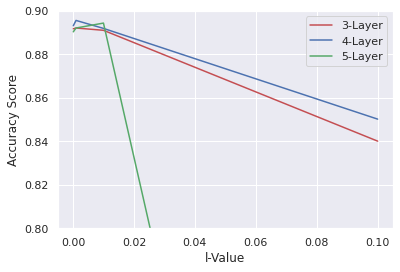

In [68]:
l_vals = [0.0001, 0.001, 0.01, 0.1]
plt.plot(l_vals, reg_acc_3, 'r') 
plt.plot(l_vals, reg_acc_4, 'b')
plt.plot(l_vals, reg_acc_5, 'g')
plt.xlabel("l-Value")
plt.ylabel("Accuracy Score")
plt.ylim(0.80,0.90)
plt.legend(['3-Layer', '4-Layer', '5-Layer'], loc='best')

##Implementing Dropout

In [69]:
def nn_model_dropout_3(dropout_val):
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation="relu", kernel_regularizer=keras.regularizers.l2(l=best_reg))) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dropout(dropout_val))
  nn_model.add(Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [70]:
def nn_model_dropout_4(dropout_val):
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation="relu", kernel_regularizer=keras.regularizers.l2(l=best_reg))) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dropout(dropout_val))
  nn_model.add(Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dropout(dropout_val))
  nn_model.add(Dense(12, activation="relu", kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [71]:
def nn_model_dropout_5(dropout_val):
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation="relu", kernel_regularizer=keras.regularizers.l2(l=best_reg))) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dropout(dropout_val))
  nn_model.add(Dense(20, activation="relu", kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dropout(dropout_val))
  nn_model.add(Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dropout(dropout_val))
  nn_model.add(Dense(12, activation="relu", kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [72]:
dropout_acc_3 = []
dropout_acc_4 = []
dropout_acc_5 = []
highest_do_accuracy = -1
best_do = -1
best_do_layer = -1
print("3-Layer Neural Network\n")
for dropout_val in [0.1, 0.2, 0.3, 0.4, 0.5]:
  model_dropout = nn_model_dropout_3(dropout_val)
  model_dropout.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)
  loss_do, accuracy_do = model_dropout.evaluate(X_test, dummy_y_test, verbose=0)
  print("Dropout set to:", dropout_val)
  print("Loss:", loss_do)
  print("Accuracy:", accuracy_do)
  print("\n")
  dropout_acc_3.append(accuracy_do)
  if (accuracy_do > highest_do_accuracy):
    highest_do_accuracy = accuracy_do
    best_do = dropout_val
    best_do_layer = 3

print("4-Layer Neural Network\n")
for dropout_val in [0.1, 0.2, 0.3, 0.4, 0.5]:
  model_dropout = nn_model_dropout_4(dropout_val)
  model_dropout.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)
  loss_do, accuracy_do = model_dropout.evaluate(X_test, dummy_y_test, verbose=0)
  print("Dropout set to:", dropout_val)
  print("Loss:", loss_do)
  print("Accuracy:", accuracy_do)
  print("\n")
  dropout_acc_4.append(accuracy_do)
  if (accuracy_do > highest_do_accuracy):
    highest_do_accuracy = accuracy_do
    best_do = dropout_val
    best_do_layer = 4

print("5-Layer Neural Network\n")
for dropout_val in [0.1, 0.2, 0.3, 0.4, 0.5]:
  model_dropout = nn_model_dropout_5(dropout_val)
  model_dropout.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)
  loss_do, accuracy_do = model_dropout.evaluate(X_test, dummy_y_test, verbose=0)
  print("Dropout set to:", dropout_val)
  print("Loss:", loss_do)
  print("Accuracy:", accuracy_do)
  print("\n")
  dropout_acc_5.append(accuracy_do)
  if (accuracy_do > highest_do_accuracy):
    highest_do_accuracy = accuracy_do
    best_do = dropout_val
    best_do_layer = 5

3-Layer Neural Network

Dropout set to: 0.1
Loss: 0.3391839861869812
Accuracy: 0.8969972133636475


Dropout set to: 0.2
Loss: 0.34343674778938293
Accuracy: 0.8929818272590637


Dropout set to: 0.3
Loss: 0.36672794818878174
Accuracy: 0.8882681727409363


Dropout set to: 0.4
Loss: 0.37715423107147217
Accuracy: 0.8915851712226868


Dropout set to: 0.5
Loss: 0.36696740984916687
Accuracy: 0.8887919187545776


4-Layer Neural Network

Dropout set to: 0.1
Loss: 0.3461187481880188
Accuracy: 0.8917597532272339


Dropout set to: 0.2
Loss: 0.3646191656589508
Accuracy: 0.8859986066818237


Dropout set to: 0.3
Loss: 0.38209375739097595
Accuracy: 0.8866969347000122


Dropout set to: 0.4
Loss: 0.4239634573459625
Accuracy: 0.8884427547454834


Dropout set to: 0.5
Loss: 0.4560350775718689
Accuracy: 0.8669692873954773


5-Layer Neural Network

Dropout set to: 0.1
Loss: 0.3570409417152405
Accuracy: 0.8910614252090454


Dropout set to: 0.2
Loss: 0.37572288513183594
Accuracy: 0.8891410827636719


Dropout se

In [73]:
print("Highest Accuracy Achieved:", highest_do_accuracy)
print("Corresponding Dropout Value:", best_do)
print("Corresponding Number of Layers in Model:", best_do_layer)

Highest Accuracy Achieved: 0.8969972133636475
Corresponding Dropout Value: 0.1
Corresponding Number of Layers in Model: 3


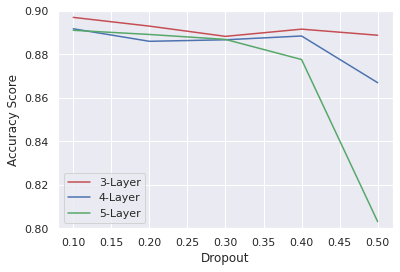

In [75]:
do_vals = [0.1, 0.2, 0.3, 0.4, 0.5]
plt.plot(do_vals, dropout_acc_3, 'r') 
plt.plot(do_vals, dropout_acc_4, 'b')
plt.plot(do_vals, dropout_acc_5, 'g')
plt.xlabel("Dropout")
plt.ylabel("Accuracy Score")
plt.ylim(0.80,0.90)
plt.legend(['3-Layer', '4-Layer', '5-Layer'], loc='best')

## Trying different activation functions

In [76]:
def nn_model_act_3(act_type):
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation=act_type, kernel_regularizer=keras.regularizers.l2(l=best_reg))) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dropout(best_do))
  nn_model.add(Dense(16, activation=act_type, kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [77]:
def nn_model_act_4(act_type):
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation=act_type, kernel_regularizer=keras.regularizers.l2(l=best_reg))) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dropout(best_do))
  nn_model.add(Dense(16, activation=act_type, kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dropout(best_do))
  nn_model.add(Dense(12, activation=act_type, kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [78]:
def nn_model_act_5(act_type):
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation=act_type, kernel_regularizer=keras.regularizers.l2(l=best_reg))) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dropout(best_do))
  nn_model.add(Dense(20, activation=act_type, kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dropout(best_do))
  nn_model.add(Dense(16, activation=act_type, kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dropout(best_do))
  nn_model.add(Dense(12, activation=act_type, kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [79]:
highest_act_accuracy = -1
best_act = -1
best_act_layer = -1
print("For 3-Layer Model\n")
for act in ["relu", "sigmoid", "tanh", "selu", "elu"]:
  model_act = nn_model_act_3(act)
  model_act.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)
  loss_act, accuracy_act = model_act.evaluate(X_test, dummy_y_test, verbose=0)
  print("Base Neural Network Model with Activation:", act)
  print("Loss:", loss_act)
  print("Accuracy:", accuracy_act)
  print("\n")
  if (accuracy_act > highest_act_accuracy):
    highest_act_accuracy = accuracy_act
    best_act = act
    best_act_layer = 3
print("For 4-Layer Model\n")
for act in ["relu", "sigmoid", "tanh", "selu", "elu"]:
  model_act = nn_model_act_4(act)
  model_act.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)
  loss_act, accuracy_act = model_act.evaluate(X_test, dummy_y_test, verbose=0)
  print("Base Neural Network Model with Activation:", act)
  print("Loss:", loss_act)
  print("Accuracy:", accuracy_act)
  print("\n")
  if (accuracy_act > highest_act_accuracy):
    highest_act_accuracy = accuracy_act
    best_act = act
    best_act_layer = 4
print("For 5-Layer Model\n")
for act in ["relu", "sigmoid", "tanh", "selu", "elu"]:
  model_act = nn_model_act_5(act)
  model_act.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)
  loss_act, accuracy_act = model_act.evaluate(X_test, dummy_y_test, verbose=0)
  print("Base Neural Network Model with Activation:", act)
  print("Loss:", loss_act)
  print("Accuracy:", accuracy_act)
  print("\n")
  if (accuracy_act > highest_act_accuracy):
    highest_act_accuracy = accuracy_act
    best_act = act
    best_act_layer = 5

For 3-Layer Model

Base Neural Network Model with Activation: relu
Loss: 0.3355952203273773
Accuracy: 0.8964734673500061


Base Neural Network Model with Activation: sigmoid
Loss: 0.5530280470848083
Accuracy: 0.880586564540863


Base Neural Network Model with Activation: tanh
Loss: 0.32417213916778564
Accuracy: 0.8924580812454224


Base Neural Network Model with Activation: selu
Loss: 0.32029902935028076
Accuracy: 0.8942039012908936


Base Neural Network Model with Activation: elu
Loss: 0.32787489891052246
Accuracy: 0.8952513933181763


For 4-Layer Model

Base Neural Network Model with Activation: relu
Loss: 0.3429517149925232
Accuracy: 0.8957751393318176


Base Neural Network Model with Activation: sigmoid
Loss: 0.6286628842353821
Accuracy: 0.8166899681091309


Base Neural Network Model with Activation: tanh
Loss: 0.34050050377845764
Accuracy: 0.8870460987091064


Base Neural Network Model with Activation: selu
Loss: 0.3218056261539459
Accuracy: 0.8964734673500061


Base Neural Networ

In [80]:
print("Activation with Best Accuracy:", best_act)
print("Accuracy:", highest_act_accuracy)
print("Corresponding Number of Layers in Model:", best_act_layer)

Activation with Best Accuracy: relu
Accuracy: 0.8964734673500061
Corresponding Number of Layers in Model: 3


## Final Neural Network Model

In [81]:
def nn_model_final():
  nn_model = Sequential()
  nn_model.add(Dense(24, input_dim=20, activation=best_act, kernel_regularizer=keras.regularizers.l2(l=best_reg))) #First hidden layer, take 20 inputs from input layer
  nn_model.add(Dropout(best_do))
  nn_model.add(Dense(16, activation=best_act, kernel_regularizer=keras.regularizers.l2(l=best_reg))) ##Hidden layer
  nn_model.add(Dense(7, activation = 'softmax')) #output layer, there are 7 total target classes
  nn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return nn_model

In [83]:
model_final = nn_model_final()
model_final.fit(X_train, dummy_y_train, batch_size=128, epochs=10, verbose=0)
loss_final, accuracy_final = model_final.evaluate(X_test, dummy_y_test, verbose=0)
print("Final Network Model with Regularization and Dropout Implemented")
print("Loss:", loss_final)
print("Accuracy:", accuracy_final)
print("\n")

Final Network Model with Regularization and Dropout Implemented
Loss: 0.3388617932796478
Accuracy: 0.8938547372817993


